In [1]:
import pandas as pd
import re
import nltk
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer 
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.cluster import AgglomerativeClustering
import numpy as np

[nltk_data] Downloading package punkt to C:\Users\Claire
[nltk_data]     Danaher\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
reviews = pd.read_csv('C:\\WPI\\InfoRet\\FinalProject\\data\\reviews_details.csv',encoding = "ISO-8859-1")
# reviews['listing_id'].value_counts()
# vc = reviews['listing_id'].value_counts()

In [3]:
reviews[1:5]

,listing_id,id,date,reviewer_id,reviewer_name,comments
1,7441144,52339991,2015-10-28,45395024,Donato,The host was extremely welcoming and obliging....
2,7441144,53933755,2015-11-14,36548987,Jason,Nice and easy stay - with good accommodations ...
3,7441144,79106284,2016-06-11,39468163,Michael,The host has been very accommodating and helpf...
4,7441144,81799307,2016-06-25,39468163,Michael,It's a great quiet stay.


In [4]:
def remove_nonalphanumeric(text):
    return re.sub("[^a-zA-Z0-9]"," ", str(text)).lower()

In [5]:
unique_listings = reviews.listing_id.unique()
len(unique_listings)

3986

In [6]:
reviews=reviews.groupby('listing_id').filter(lambda g: (g.listing_id.size >= 4))
reviews = reviews[reviews['listing_id'] != 15041925]
reviews = reviews[reviews['listing_id'] !=19102778]

unique_listings = reviews.listing_id.unique()
len(unique_listings)

3005

In [7]:
reviews['comments_1'] = reviews['comments'].apply(remove_nonalphanumeric)
reviews['tokenized_comments'] = reviews['comments_1'].apply(word_tokenize)
stopset = stopwords.words('english') + list(string.punctuation)
reviews['stop_comments'] = reviews['tokenized_comments'].apply(lambda x: [item for item in x if item not in stopset])
def func(row):
    return " ".join(row)
reviews['data'] = reviews['stop_comments'].apply(lambda x: func(x))


In [8]:
def display_topics(H,W,feature_names,documents,documents_id,listing_id,words,no_top_words,no_top_documents):
    result_list = []
    for topic_idx, topic in enumerate(H):
        message = " ".join(([feature_names[i]
                             for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort(W[:,topic_idx])[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            result = (message,documents_id[doc_index],listing_id[doc_index],documents[doc_index],words[doc_index])
            result_list.append(result)

    return result_list

In [9]:
no_top_words = 5
no_top_documents = 10
result=[]

In [12]:
for each_listing in unique_listings:
    print(each_listing)
    
    listing_reviews=reviews[reviews['listing_id']==each_listing]
    tf_vectorizer = CountVectorizer(max_df=0.80, min_df=2, max_features=500)
    tf = tf_vectorizer.fit_transform(listing_reviews['data'])
    print('term')
    tf[1:5]
    tf_feature_names = tf_vectorizer.get_feature_names()
    print(tf_feature_names)
    lda = LatentDirichletAllocation(n_topics = 5, max_iter = 5,learning_method='online',learning_offset=50., random_state=0).fit(tf)
    lda_W = lda.transform(tf)
    lda_H = lda.components_
    output = display_topics(lda_H,lda_W,tf_feature_names,list(listing_reviews['comments']),list(listing_reviews['id']),list(listing_reviews['listing_id']),list(listing_reviews['data']),no_top_words,no_top_documents)
    result += output

result_df = pd.DataFrame(result, columns=['Topic','Review_Id','Listing_Id','Documents','Words'])
result_df.to_csv("Result_entire.csv",columns=["Topic","Review_Id","Listing_Id","Documents","Words"])

7441144
term
['cable', 'good', 'host', 'neighborhood', 'nice', 'quiet', 'stay', 'tv']
12233830
term
['10', '15', 'able', 'absolutely', 'access', 'accommodating', 'accommodations', 'add', 'advice', 'airbnb', 'airport', 'allston', 'als', 'also', 'always', 'amazing', 'amenities', 'amount', 'ample', 'another', 'answer', 'anyone', 'anything', 'apartment', 'appartement', 'appointed', 'appreciated', 'apt', 'area', 'around', 'arrival', 'arrived', 'asked', 'assist', 'attention', 'attentive', 'available', 'away', 'awesome', 'back', 'balance', 'bars', 'basement', 'bathroom', 'bedroom', 'bedrooms', 'best', 'better', 'beyond', 'bit', 'blocks', 'book', 'boston', 'bottle', 'brand', 'bright', 'bring', 'bus', 'came', 'car', 'challenge', 'charm', 'check', 'checked', 'checking', 'chocolate', 'chocolates', 'city', 'clean', 'cleaning', 'close', 'coffee', 'college', 'come', 'comfortable', 'communicated', 'communication', 'concerns', 'condo', 'convenient', 'cool', 'corner', 'could', 'daily', 'day', 'de', 'de

C:\Users\Claire Danaher\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\Claire Danaher\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\Claire Danaher\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


15444930
term
['access', 'apartment', 'area', 'arrived', 'basic', 'bathroom', 'bed', 'boston', 'building', 'cheap', 'check', 'city', 'clean', 'close', 'comfortable', 'could', 'downtown', 'easy', 'equipped', 'every', 'everything', 'floor', 'go', 'good', 'great', 'highly', 'kitchen', 'leave', 'location', 'much', 'need', 'needs', 'next', 'nice', 'night', 'noisy', 'one', 'overall', 'people', 'place', 'property', 'quick', 'recommend', 'shift', 'sketchy', 'sonder', 'sonders', 'space', 'spacious', 'stay', 'stayed', 'table', 'time', 'towels', 'two', 'us', 'use', 'well', 'wonderful', 'would']
1596470
term
['100', 'able', 'absolutely', 'access', 'accommodating', 'accommodations', 'across', 'adding', 'adults', 'advice', 'airbnb', 'alcohol', 'already', 'also', 'amazing', 'amenities', 'answering', 'anybody', 'anyone', 'anything', 'anywhere', 'apartment', 'appliance', 'appliances', 'appointed', 'appreciated', 'areas', 'around', 'arrival', 'attention', 'attractions', 'automated', 'available', 'away',

C:\Users\Claire Danaher\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\Claire Danaher\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\Claire Danaher\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


IndexError: index out of bounds: 0 <= 1 <= 4, 0 <= 5 <= 4, 1 <= 5

In [10]:

### CONDUCT CLUSTING FOR LISTING 15444930 using TF-IDF

listing_reviews=reviews[reviews['listing_id']==15444930]
names=listing_reviews['reviewer_name']
tf_vectorizer = TfidfVectorizer(max_df=0.80, min_df=2, max_features=500, stop_words='english',use_idf=True, ngram_range=(1,4))
tfidf_matrix = tf_vectorizer.fit_transform(listing_reviews['data'])
print(tfidf_matrix.shape)
terms = tf_vectorizer.get_feature_names()
print(terms)


(20, 61)
['access', 'apartment', 'area', 'arrived', 'basic', 'bathroom', 'bed', 'boston', 'building', 'cheap', 'check', 'check great', 'check great location', 'city', 'clean', 'clean comfortable', 'close', 'comfortable', 'downtown', 'easy', 'easy check', 'equipped', 'floor', 'good', 'great', 'great location', 'great location easy', 'great place', 'highly', 'kitchen', 'leave', 'location', 'location apartment', 'location easy', 'need', 'needs', 'nice', 'night', 'noisy', 'overall', 'people', 'place', 'property', 'quick', 'recommend', 'shift', 'sketchy', 'sonder', 'sonder place', 'sonders', 'space', 'spacious', 'stay', 'stay boston', 'stayed', 'table', 'time', 'time shift', 'towels', 'use', 'wonderful']


In [11]:
comments=listing_reviews['comments']

In [12]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [13]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [15]:
clust = {  'cluster': clusters }

frame = pd.DataFrame(clust, index = [clusters] , columns = [ 'cluster'])

In [16]:
frame['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

4    5
2    5
3    4
1    3
0    3
Name: cluster, dtype: int64

In [17]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:\n" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(terms[ind])
    print() #add whitespace
    print() #add whitespace
    

    
print()
print()

Top terms per cluster:

Cluster 0 words:
comfortable
clean comfortable
nice
bed
time
shift


Cluster 1 words:
place
great place
cheap
great
needs
kitchen


Cluster 2 words:
recommend
apartment
time
check
access
clean


Cluster 3 words:
close
stay
sonder place
place
boston
wonderful


Cluster 4 words:
space
location
apartment
great
check
bed






In [19]:
frame[1:5]

,cluster
2,2
2,2
1,1
4,4


In [20]:
print(comments[1:5])

184    We spent a lovely time in this super well loca...
185       Great access and convenient. Would recommend! 
186                               Great place and cheap.
187    It was a good experience. Sonder's team is ver...
Name: comments, dtype: object


In [101]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)


In [102]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right");

plt.tick_params(
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [83]:
def top_tfidf_feats(row, features, top_n=10):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [131]:

row=np.squeeze(xtr[3].toarray())
#print(row)
x=top_tfidf_feats(row, feature)
row=np.squeeze(xtr[7].toarray())
y=top_tfidf_feats(row, feature)
print(x)
print(y)

        feature     tfidf
0          lots  0.249482
1       located  0.249482
2       tourist  0.249482
3       initial  0.249482
4   attractions  0.249482
5     regarding  0.249482
6         major  0.249482
7          give  0.249482
8          slow  0.219299
9    experience  0.219299
10      contact  0.219299
11        right  0.219299
12      process  0.219299
13        great  0.209251
14          bit  0.197883
15      overall  0.197883
16        check  0.181272
17       access  0.167700
18       alicia  0.146284
19      newbury  0.146284
20       street  0.137516
21        place  0.129673
22         five  0.000000
23         felt  0.000000
24         feet  0.000000
        feature     tfidf
0          like  0.233270
1        basics  0.225764
2        rental  0.192628
3          even  0.172644
4        toilet  0.152788
5       pillows  0.152788
6         paper  0.152788
7          help  0.128419
8         gives  0.128419
9         motel  0.128419
10        using  0.128419
11     sleep

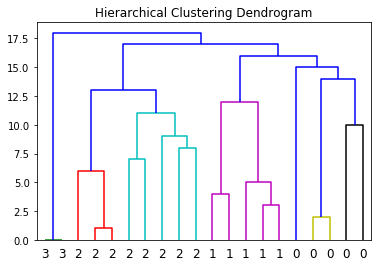

In [134]:
# Authors: Mathew Kallada
# License: BSD 3 clause
"""
=========================================
Plot Hierarachical Clustering Dendrogram 
=========================================
This example plots the corresponding dendrogram of a hierarchical clustering
using AgglomerativeClustering and the dendrogram method available in scipy.
"""

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(cluster, labels=cluster.labels_)
plt.show()

In [70]:
print(listing_reviews[1])

KeyError: 1